##Loading Libraries

In [2]:
import pandas as pd
import time
import numpy as np
import sklearn as sk
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preparing and loading the data

In [4]:
df_adm= pd.read_excel('/content/drive/MyDrive/OneDrive_1_3-7-2022/2122 ADM 091021.xlsx')
df_finaid =pd.read_excel("/content/drive/MyDrive/OneDrive_1_3-7-2022/2122 FINAID 091021.xlsx")
df_fund = pd.read_excel("/content/drive/MyDrive/OneDrive_1_3-7-2022/2122 FUND 091021.xlsx")
df_sf = pd.read_excel("/content/drive/MyDrive/OneDrive_1_3-7-2022/2122 SF.xlsx")


In [5]:
print(df_adm.shape)
print(df_finaid.shape)
print(df_fund.shape)
print(df_sf.shape)

(17361, 19)
(17463, 12)
(16447, 7)
(270546, 6)


###Merging all excel files

In [6]:
df_combine1 = df_adm.merge(df_finaid, how="inner") #combining df_adm and df_finaid
df_combine1.shape

(17470, 30)

In [7]:
df_combine2 = df_combine1.merge(df_fund, how="inner")
df_combine2.shape

(16564, 36)

In [8]:
df_combine3 = df_combine2.merge(df_sf, how='inner')
df_combine3.shape

(15979, 41)

In [9]:
col_inf=pd.DataFrame(df_combine3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  15979 non-null  int64         
 1   EntryTerm           15979 non-null  int64         
 2   MaxEntryStatus      15979 non-null  object        
 3   RECALCGPA           15979 non-null  float64       
 4   AppDate             15979 non-null  datetime64[ns]
 5   AdmitDate           15979 non-null  datetime64[ns]
 6   MaxWithdrawalInd    15979 non-null  object        
 7   GENDER              15979 non-null  object        
 8   FirstGen            5218 non-null   object        
 9   LEGACY              3103 non-null   object        
 10  SCHOLARSHIPTEST     11588 non-null  float64       
 11  RHOP                1204 non-null   object        
 12  CCP                 1158 non-null   object        
 13  MAJOR               15979 non-null  object    

##Handling Duplicates

In [10]:
print("Number of duplicate student IDs:", df_combine3['ID'].duplicated().sum())

Number of duplicate student IDs: 179


In [11]:
df_combine3.drop_duplicates('ID', keep= "first",inplace=True)

In [12]:
df_combine3['ID'].duplicated().sum()

0

##Missing Values

###NA/Null values percentage

              Variable  NA_Percent
8             FirstGen   67.386076
9               LEGACY   80.588608
10     SCHOLARSHIPTEST   27.398734
11                RHOP   92.537975
12                 CCP   92.759494
14    MaxAdmPopulation    0.303797
16         DepositDate   72.594937
17          COHORT_IND   76.031646
18             TMST_15   73.405063
20     PELL_EFC_CENSUS   20.962025
21      DEPENDENCYCODE   20.708861
23       FAFSARCVDDATE   20.708861
24  AWDPACKAGECOMPLETE   28.455696
25    PARMARITALSTATUS   21.955696
26           PAR1GRLVL   21.259494
27           PAR2GRLVL   24.398734
28    HOUSINGAPPSTATUS   20.715190
29    TUITIONRESIDENCY    0.158228
32        SCH_DEC_DATE    4.443038
35       LOAN_DEC_DATE   28.487342
38           VisitDate   81.746835


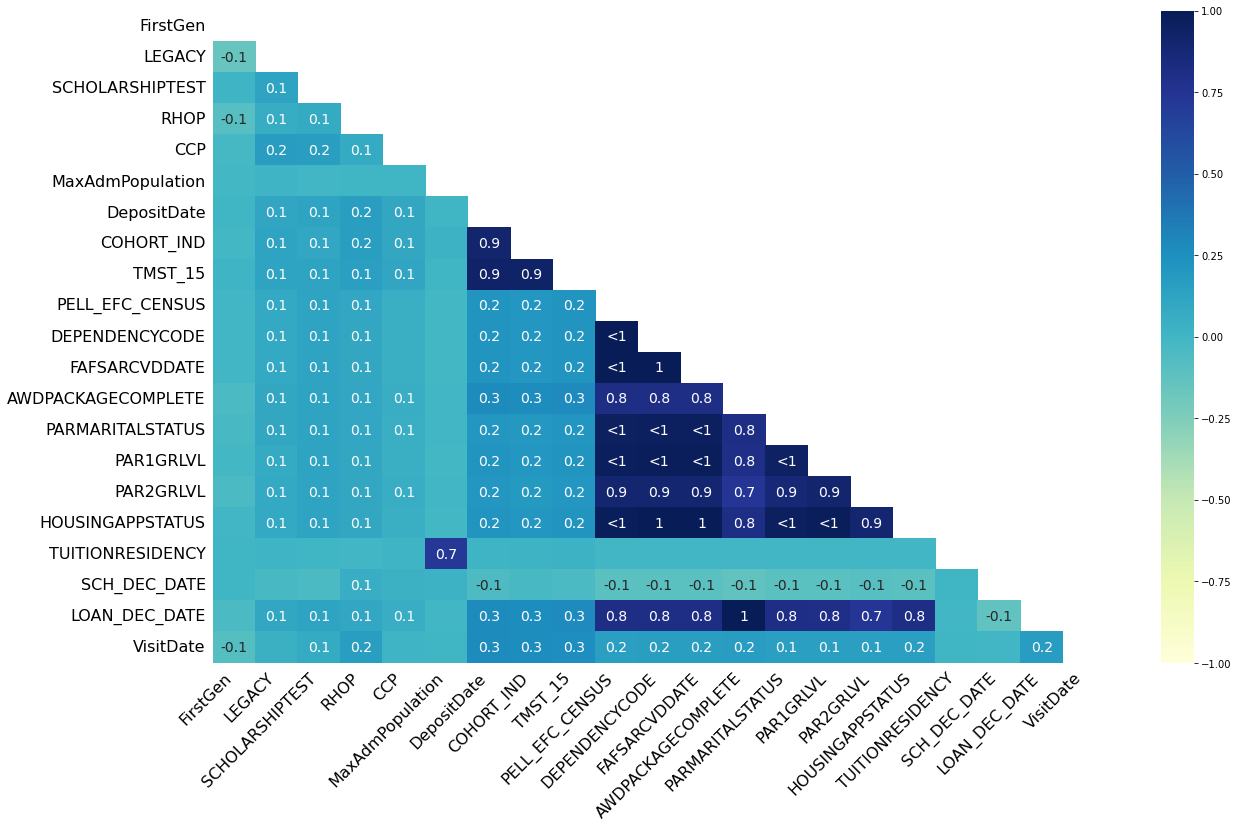

In [13]:
NA=df_combine3.isnull().sum()
NA_name= list(NA.keys())

NA_df= pd.DataFrame(zip(NA_name,(NA/len(df_combine3)*100)), columns= ["Variable", "NA_Percent"])
print(NA_df[NA_df['NA_Percent']>0])

msno.heatmap(df_combine3, cmap='YlGnBu')

###Imputing NA values

In [14]:
#For FirstGen(i.e If a student is first generation of the family to attend college) imputing Null values with 'N' since they are not First generation to attend college

df_combine3['FirstGen'].fillna('N',inplace=True)

In [15]:
#For RHOP(i.e Students admitted to Honors college), imputing Null values with N and replacing "RHOP" value to "Y"
df_combine3.RHOP.replace("RHOP", "Y", inplace=True)
df_combine3.RHOP.fillna("N", inplace=True)
df_combine3.RHOP.unique()

array(['N', 'Y'], dtype=object)

In [16]:
#For Legacy
df_combine3.LEGACY.fillna("None", inplace=True)
df_combine3.LEGACY.unique()

array(['None', 'G', 'P', 'S', 'A', 'U'], dtype=object)

In [17]:
#For TMST_15
df_combine3.TMST_15.replace(['FT','3Q', 'HT', 'LH'], "Enrolled",inplace=True)
df_combine3.TMST_15.fillna("00", inplace=True)
df_combine3.TMST_15.replace("00", "Not Enrolled", inplace=True)
df_combine3.TMST_15.unique()


array(['Enrolled', 'Not Enrolled'], dtype=object)

In [18]:
#For CCP()
df_combine3.CCP.fillna("N", inplace=True)
#df_combine3.CCP.unique()

In [19]:
#used kNN imputation to impute values for SCHOLARSHIPTEST variable
#kNN_imputer = KNNImputer()
#df_combine3.SCHOLARSHIPTEST=kNN_imputer.fit_transform(df_combine3[["SCHOLARSHIPTEST"]])
#df_combine3.SCHOLARSHIPTEST.isna().sum()

In [20]:
#Scholarshiptest variable contains marks obtained in the scholarship test. The missing values mean that the student never took the scholarship test.
#df_combine3.SCHOLARSHIPTEST.isna().sum()
#df_combine3.SCHOLARSHIPTEST.min()
df_combine3.SCHOLARSHIPTEST.fillna(0, inplace=True)

df_combine3['Sch_test_taken'] = np.where(df_combine3['SCHOLARSHIPTEST']>0, 'Y', 'N')



In [21]:
#COHORT_IND
#print(df_combine3.COHORT_IND.isna().sum())
df_combine3.COHORT_IND.fillna("N", inplace=True)
#df_combine3.COHORT_IND.unique()

In [22]:
#Visit_date - If the student has toured the university - Dropping this variable
#print(df_combine3.VisitDate.isna().sum())
#print(df_combine3.VisitDate.value_counts())
df_combine3.Visited.value_counts()
df_combine3.drop(labels="VisitDate", axis=1, inplace=True)


In [23]:
#Housing Application Status
df_combine3.HOUSINGAPPSTATUS.fillna(0, inplace=True)

housingappstatus_dict = {0:'notapp', 1: ' with_parents', 2: ' campus_housing', 3:'off_campus' }
df_combine3['HOUSINGAPPSTATUS']=df_combine3['HOUSINGAPPSTATUS'].map(housingappstatus_dict)
df_combine3['HOUSINGAPPSTATUS'].unique()

array([' campus_housing', ' with_parents', 'notapp', 'off_campus'],
      dtype=object)

In [24]:
#Creating a new variable using deposit date with Y/N to denote if a deposit was made or not
df_combine3.DepositDate.fillna('NA', inplace=True)
df_combine3["Deposit_made"] = np.where((df_combine3['DepositDate']!= "NA") , 'Y','N')
#df_combine3.Deposit_made.unique()
#Dropping Deposit_date
df_combine3.drop(labels="DepositDate", axis=1, inplace=True)

In [25]:
df_combine3.PELL_EFC_CENSUS.isna().sum()
df_combine3.PELL_EFC_CENSUS.fillna(0, inplace=True)

In [26]:
#Imputed dependencycode with mode (i.e D)
print(df_combine3.DEPENDENCYCODE.value_counts())
df_combine3['DEPENDENCYCODE'].fillna(df_combine3['DEPENDENCYCODE'].mode()[0], inplace= True)


D    12318
I      210
Name: DEPENDENCYCODE, dtype: int64


In [27]:
#Converting it to date format
df_combine3.AWDPACKAGECOMPLETE = pd.to_datetime(df_combine3["AWDPACKAGECOMPLETE"])
df_combine3.drop(labels="AWDPACKAGECOMPLETE", axis=1, inplace=True )

In [28]:
##corr = df_combine3.corr()
#corr.style.background_gradient(cmap='BrBG_r')

In [29]:
#Removing timestamp from all the variables with Datetime datatype
dt_var= pd.DataFrame(zip(df_combine3.columns, df_combine3.dtypes))
dt_var.columns=["Variable", "DataType"]
dt_var_DT = dt_var[dt_var['DataType']== "datetime64[ns]"]

for x in dt_var_DT.Variable:
  df_combine3[x] = pd.to_datetime(df_combine3[x]).dt.date

In [30]:
#Removed dates since they have missing values and the high correlation with other attributes
df_combine3.drop(["FAFSARCVDDATE","SCH_DEC_DATE","LOAN_DEC_DATE"],axis=1, inplace=True)

In [31]:
#TuitionResidency imputed with mode
print(df_combine3.TUITIONRESIDENCY.value_counts())

df_combine3.TUITIONRESIDENCY.fillna(df_combine3.TUITIONRESIDENCY.mode()[0], inplace= True)
df_combine3.TUITIONRESIDENCY.isna().sum()

R    11576
O     2988
W     1211
Name: TUITIONRESIDENCY, dtype: int64


0

In [32]:
#Not Applicable - 0
#Married or remarried - 1
#Never married - 2
#Divorced or separated - 3
#Widowed - 4
#Unmarried and both legal parents living together - 5

print(df_combine3.PARMARITALSTATUS.value_counts())
df_combine3.PARMARITALSTATUS.fillna(0, inplace= True)
# print(df_combine3.PARMARITALSTATUS.value_counts())

#df_combine3['PARMARITALSTATUS'] = df_combine3['PARMARITALSTATUS'].astype(np.int64)

mar_dictionary ={0 : 'Not Applicable', 1. : 'Married or remarried',
                 2 : 'Never married', 3:'Divorced or separated', 4:'Widowed', 
                 5:'Unmarried and both legal parents living together'}
df_combine3['PARMARITALSTATUS'] = df_combine3['PARMARITALSTATUS'].map(mar_dictionary)


1.0    8618
3.0    2222
2.0    1207
4.0     227
5.0      57
Name: PARMARITALSTATUS, dtype: int64


In [33]:
#Middle school/Jr. High - 1
#High school - 2
#College or beyond - 3
#Other/unknown - 4

#print(df_combine3.PAR1GRLVL.value_counts())
df_combine3.PAR1GRLVL.fillna(0, inplace= True)
df_combine3["PAR1GRLVL"] = df_combine3["PAR1GRLVL"].astype("category")

#print(df_combine3.PAR2GRLVL.value_counts())
df_combine3.PAR2GRLVL.fillna(0, inplace= True)
df_combine3["PAR2GRLVL"] = df_combine3["PAR2GRLVL"].astype("category")


In [34]:
pgl_dict ={0: 'NotApp', 1:'Middle_school/Jr_High', 2: 'High_school', 3: 'College_or_beyond', 4:'Other_Unknown'}
df_combine3["PAR1GRLVL"] = df_combine3["PAR1GRLVL"].map(pgl_dict)
df_combine3["PAR2GRLVL"] = df_combine3["PAR2GRLVL"].map(pgl_dict)

In [35]:
df_combine3["PAR1GRLVL"].value_counts()

College_or_beyond        8506
High_school              3445
NotApp                   3359
Other_Unknown             282
Middle_school/Jr_High     208
Name: PAR1GRLVL, dtype: int64

In [36]:
df_combine3["PAR2GRLVL"].value_counts()

College_or_beyond        6784
High_school              4071
NotApp                   3855
Other_Unknown             781
Middle_school/Jr_High     309
Name: PAR2GRLVL, dtype: int64

In [37]:
df_combine3.MaxAdmPopulation.value_counts()
df_combine3.MaxAdmPopulation.fillna(df_combine3.MaxAdmPopulation.mode()[0], inplace=True)

In [38]:
#Converting all categorical varibles into factors
cats= ['EntryTerm', 'MaxEntryStatus', 'RHOP', 'CCP', 'MAJOR','Race', 'COHORT_IND', 'TMST_15', 'ADMIT_TERM',
       'DEPENDENCYCODE','PARMARITALSTATUS', 'PAR1GRLVL','PAR2GRLVL','MaxAdmPopulation', 'HOUSINGAPPSTATUS', 'TUITIONRESIDENCY',
       'SCH_ACPT', 'SCH_DECLINE', 'LOAN_ACPT', 'LOAN_DECLINE', 'FirstInqSource', 'NumberOfVisits','FAFSARCVD', 
       'Visited', 'Sch_test_taken', 'Deposit_made', 'MaxWithdrawalInd', 'GENDER', 'FirstGen', 'LEGACY' ]

for x in cats:
  df_combine3[x] = df_combine3[x].astype("category")

In [39]:
df = df_combine3

##Encoding the categorical varibales

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
#OneHot Encoding 
ohe= OneHotEncoder()
enc_df = pd.DataFrame(ohe.fit_transform(df[cats].drop('TMST_15', axis=1)).toarray())

In [42]:
ohe.get_feature_names_out(input_features=ohe.feature_names_in_)
enc_df.columns = ohe.get_feature_names_out()

In [43]:
enc_df.head()

,EntryTerm_202160,EntryTerm_202180,MaxEntryStatus_F,RHOP_N,RHOP_Y,CCP_N,CCP_Y,MAJOR_ACCT,MAJOR_ADV,MAJOR_AEDG,...,GENDER_F,GENDER_M,FirstGen_N,FirstGen_Y,LEGACY_A,LEGACY_G,LEGACY_None,LEGACY_P,LEGACY_S,LEGACY_U
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
enc_df.reset_index(drop=True, inplace=True)

In [45]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [46]:
#Label Encoding
df1 = MultiColumnLabelEncoder(columns = [ 'TMST_15','AppDate', 'AdmitDate','FirstInqDate']).fit_transform(df)

In [47]:
no_cats_df = df1.drop(['EntryTerm', 'MaxEntryStatus', 'RHOP', 'CCP', 'MAJOR','Race', 'COHORT_IND', 'ADMIT_TERM',
       'DEPENDENCYCODE','PARMARITALSTATUS', 'PAR1GRLVL','PAR2GRLVL','MaxAdmPopulation', 'HOUSINGAPPSTATUS', 'TUITIONRESIDENCY',
       'SCH_ACPT', 'SCH_DECLINE', 'LOAN_ACPT', 'LOAN_DECLINE', 'FirstInqSource', 'NumberOfVisits','FAFSARCVD', 
       'Visited', 'Sch_test_taken', 'Deposit_made', 'MaxWithdrawalInd', 'GENDER', 'FirstGen', 'LEGACY' ], axis=1)
no_cats_df.reset_index(drop=True, inplace=True)

In [48]:
df2 = pd.concat([no_cats_df, enc_df], axis=1)
df2

,ID,RECALCGPA,AppDate,AdmitDate,SCHOLARSHIPTEST,TMST_15,PELL_EFC_CENSUS,FirstInqDate,EntryTerm_202160,EntryTerm_202180,...,GENDER_F,GENDER_M,FirstGen_N,FirstGen_Y,LEGACY_A,LEGACY_G,LEGACY_None,LEGACY_P,LEGACY_S,LEGACY_U
0,120957007,2.70,36,38,14.0,0,0.0,65,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,102554310,2.95,99,77,18.0,0,0.0,289,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,170965039,3.63,105,76,28.0,0,10564.0,694,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,131260604,4.00,119,87,24.0,0,20587.0,357,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,119542072,4.00,55,19,20.0,1,0.0,741,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15795,182911666,4.00,83,131,24.0,1,0.0,799,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15796,110413270,3.49,117,140,0.0,1,0.0,841,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15797,103523540,2.99,160,133,0.0,0,0.0,873,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15798,152180035,3.50,136,109,0.0,1,256548.0,761,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#Correlated features removal

In [49]:
corr_matrix_1 = df2.corr().abs()
corr_matrix_1
corr_matrix_1.style.background_gradient(cmap='coolwarm')
upper_2 = corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape), k=1).astype(bool))

to_drop_2 = [column for column in upper_2.columns if any(upper_2[column] > 0.90)]
(to_drop_2)



['EntryTerm_202180',
 'RHOP_Y',
 'CCP_Y',
 'COHORT_IND_N',
 'COHORT_IND_Y',
 'ADMIT_TERM_202160',
 'ADMIT_TERM_202180',
 'DEPENDENCYCODE_I',
 'PAR1GRLVL_NotApp',
 'PAR2GRLVL_NotApp',
 'HOUSINGAPPSTATUS_notapp',
 'SCH_DECLINE_1',
 'LOAN_ACPT_1',
 'LOAN_DECLINE_1',
 'NumberOfVisits_1',
 'FAFSARCVD_N',
 'FAFSARCVD_Y',
 'Visited_NO',
 'Visited_YES',
 'Sch_test_taken_N',
 'Sch_test_taken_Y',
 'Deposit_made_N',
 'Deposit_made_Y',
 'MaxWithdrawalInd_Y',
 'GENDER_M',
 'FirstGen_Y']

In [50]:
df3=df2.drop(to_drop_2, axis=1)
df3.drop('MaxWithdrawalInd_N', axis=1, inplace=True)

##Saving the cleaned and processed df in google drive

In [51]:
path = '/content/drive/MyDrive/OneDrive_1_3-7-2022/df4.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f: df3.to_csv(f)